### Intalación de librerias

In [ ]:
!pip install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
!pip install top2vec
!cp -r /content/drive/MyDrive/Lenguaje/Proyecto/Modules Modules

### Librerias

In [ ]:
from Modules.functions import get_centroid_topics
from Modules.params import get_params
import matplotlib.pyplot as plt
from pandas import read_csv
from top2vec import Top2Vec
import matplotlib as mpl
from os.path import join

### Lectura del modelo

In [ ]:
params=get_params()
filename=join(params["path models"],
              params["news model"])
model = Top2Vec.load(filename)

### Lectura de los resultados de HD

In [ ]:
filename = join(params["path results"],
                "news_clustered.csv")
clustered = read_csv(filename)
centroids = get_centroid_topics(clustered,
                                model)

### Grafica de los topicos más relevantes

(2.128345555, 14.072795545, 3.9058631000000004, 13.694716900000001)

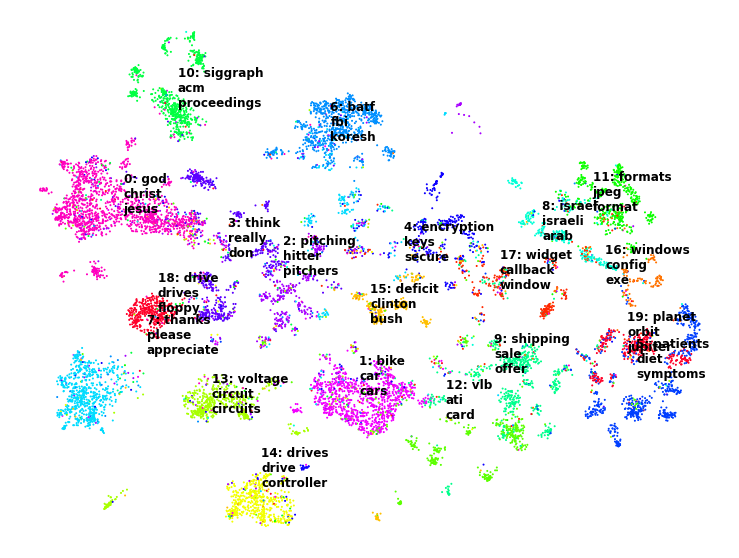

In [ ]:
bounds = list(range(0, 20))
cmap = mpl.cm.gist_rainbow_r
norm = mpl.colors.BoundaryNorm(bounds,
                               cmap.N)
plt.subplots(figsize=(13, 10))
plt.scatter(clustered.x,
            clustered.y,
            c=clustered["topic"],
            cmap=cmap,
            norm=norm,
            s=1)
for index, data in centroids.items():
    topic_name = data["topic name"]
    centroid = data["centroid"]
    plt.text(centroid[0],
             centroid[1],
             topic_name,
             fontsize=12,
             weight='bold')
plt.axis("off")